# Stage 1. Understanding The Problem
Predict housing value from historic data with over 80 independent variables. 

# Stage 2. Data ingestion/loading

In [88]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("house_prices.csv")


After exploring data it is now time to clear data. This includes: Deal with missing data, outliers, deal with correlated features, handle text and categorical features, and feature scaling.

# Stage 3. Data evaluation and  exploration

In [ ]:
# Find the number of rows and columns
data.shape  

(1460, 81)

In [90]:
# List a few observations from the top
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
# List the name of features, how many features?
data.columns # list of 81 features (column labels)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Use dtype to distinguish between numerical and catagorical features.
Use describe() function to examine statistical values of numerical features.It shows a summary of numerial features, which can be visualized using boxplots and histograms.
The descibe() function ignors the null values when computing statistical values.

In [92]:
data.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose() # use transpose for an easier viewing

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0


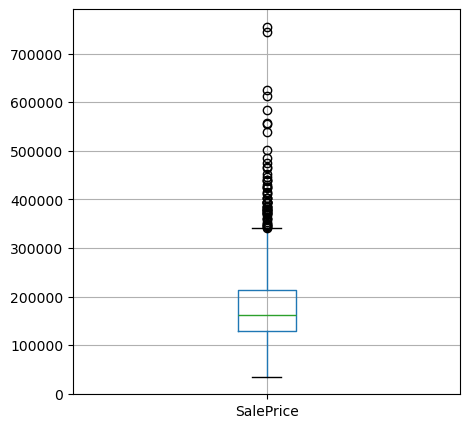

In [147]:
# Can boxplot individual features 
data.boxplot(['SalePrice'], figsize=(5, 5))
plt.show()

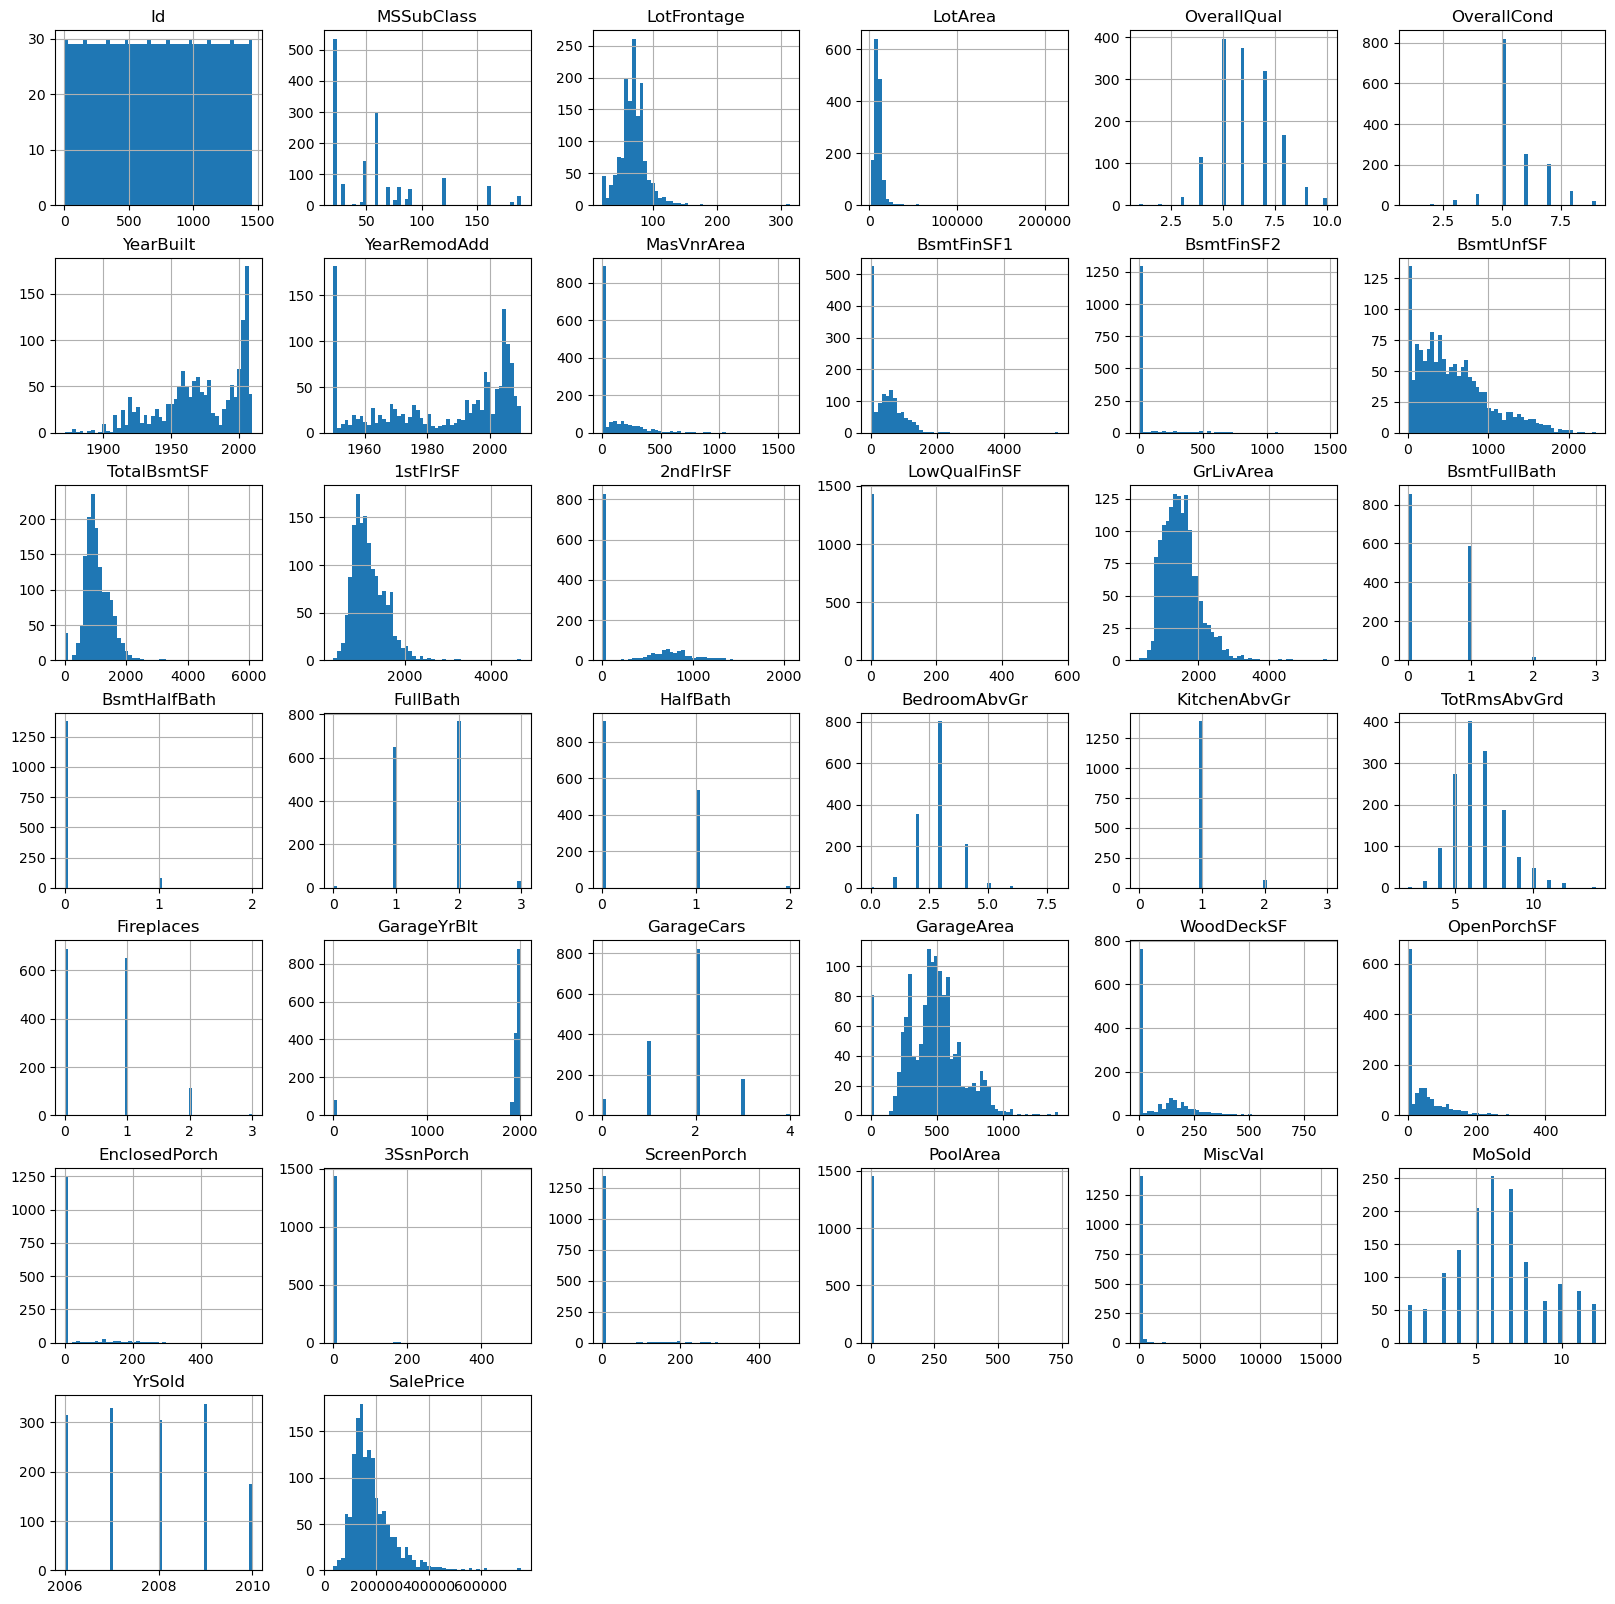

In [148]:
# histogram
data.hist(bins=50, figsize=(20, 20))
plt.show()

In [95]:
data.info() # many of the columns have missing values. 
# a quick way to get data types and non-null values. Row 6 has only 91 non-null values out of 1460

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ul><li>
total observations: 1460: make sure you understand what is each observation. In this case, each observation is the data about a house feature</li>
    <li>total columns (features): 81</li>
    <li>Observe the data type of each feature</li>
   <li> meaning of each feature: it is very important to work with domain expert to fully understand each feature</li>
    <li>any null values (e.g., LotFrontage is 1201, which indicates null values - will handle later</li>
  </ul>

In [ ]:
# Number of columns for each data type. value_counts() can be used to generate a summary of categorical features.
data.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [ ]:
# Given that .boxplot() and .hist() only handle numerical features. 
# We cannot forget ocean_proximity, which is object type (no need to change to string)
data['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

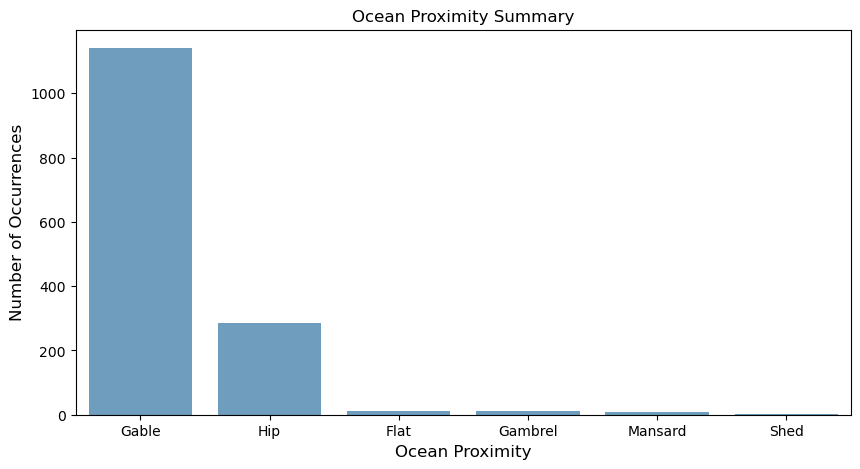

In [98]:
op_count = data['RoofStyle'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index,y= op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()
#data['RoofStyle'].value_counts().hist()

Let's examine the categorical features. We can get the number of unique values and the count for the top value. We also get the count of non-null values.

In [99]:
data.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [100]:
# Another way to get unique values for each type of data
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [101]:
cat=data.select_dtypes('object')
for x in cat:
    print('{} = {}'.format(x, data[x].unique()))

MSZoning = ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street = ['Pave' 'Grvl']
Alley = [nan 'Grvl' 'Pave']
LotShape = ['Reg' 'IR1' 'IR2' 'IR3']
LandContour = ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities = ['AllPub' 'NoSeWa']
LotConfig = ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope = ['Gtl' 'Mod' 'Sev']
Neighborhood = ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 = ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 = ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType = ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle = ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle = ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl = ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

In [102]:
#number of unique values in each feature
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

list columns in a decreasing order of number of missing values.<br>
The to_string() is used to display all the rows.
   

In [103]:
print(data.isnull().sum().sort_values(ascending=False).to_string())

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

we can assume that PoolQC to Bsmt attributes are missing from the houses (houses without pools, basements, garage etc.). Therefore, the missing values could be filled with “None”, meaning that the houses don't have the missing values.

In [104]:
fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

In [105]:
data[fill_none] =data[fill_none].fillna("None")

For LotFrontage, we are going to compute the median LotFrontage for all the houses in the same neighborhood, instead of the plain median for the entire column, and use that to impute on a neighborhood by neighborhood basis. Note that there are 25 Neighborhoods

In [106]:
# data['LotFrontage'].fillna(data.groupby("Neighborhood")["LotFrontage"].transform('median'), inplace = True) 

In [ ]:
# Above command can also be done as follows using lamda function
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))  

In [108]:
print(data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  None      Reg   
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

We are going to replace missing values for most of the numerical columns with zero, one and  the mode of the feature.

In [109]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    data[col] = data[col].fillna(int(0)) #GarageYrBlt, GarageArea and GarageCars replace with zero

In [110]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(int(0)) #MasVnrArea : replace with zero

In [111]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical']).mode()[0]

No need for the feature "Utilities"

In [112]:
data.drop(['Utilities'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [ ]:
# Get the count again to verify that we do not have any more missing values.
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In this example we will try to predict the price of a house based on selected features.</br>
Start by looking into the distribution of each feature using the displot() function in seaborn package

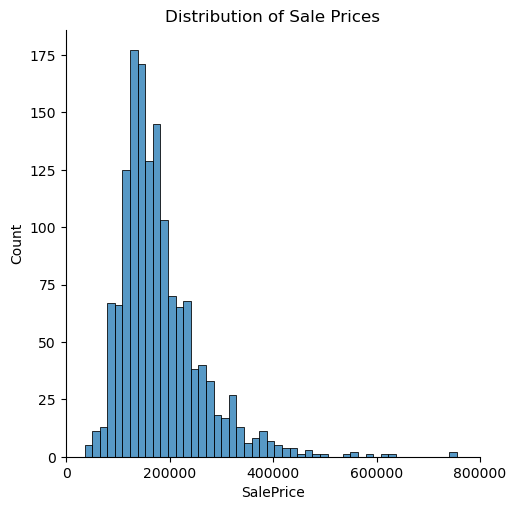

In [114]:
# The plot of the distribution is skewed to the right a bit. Ideally we want normal distributions 
# for linear regression modeling. 
sns.displot(data['SalePrice'])
plt.title('Distribution of Sale Prices')
plt.xticks(np.arange(0,800001,200000))
plt.show()

informations on the target

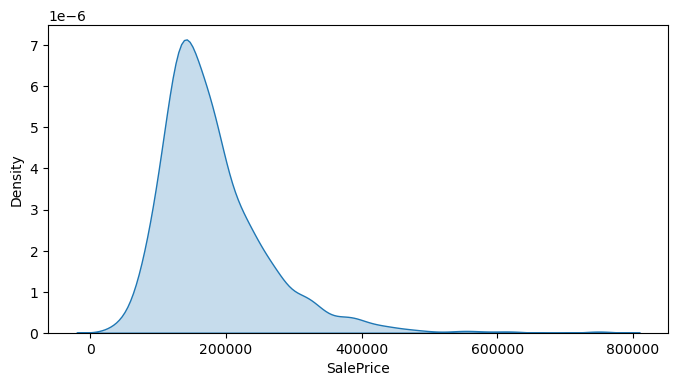

In [115]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data.SalePrice, fill=True)
plt.show()

In [116]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let's plot the distribution for all the features. But before that we can drop the "id" feature and the "SalePrice" feature

In [117]:
data2 = data.select_dtypes(exclude=['object']).drop(['Id','SalePrice'], axis=1).copy()

In [118]:
type(data2)

pandas.core.frame.DataFrame

In [119]:
len(data2.transpose())  # there are now 36 features that can be plotted in a 9 X 4 array of subplots

36

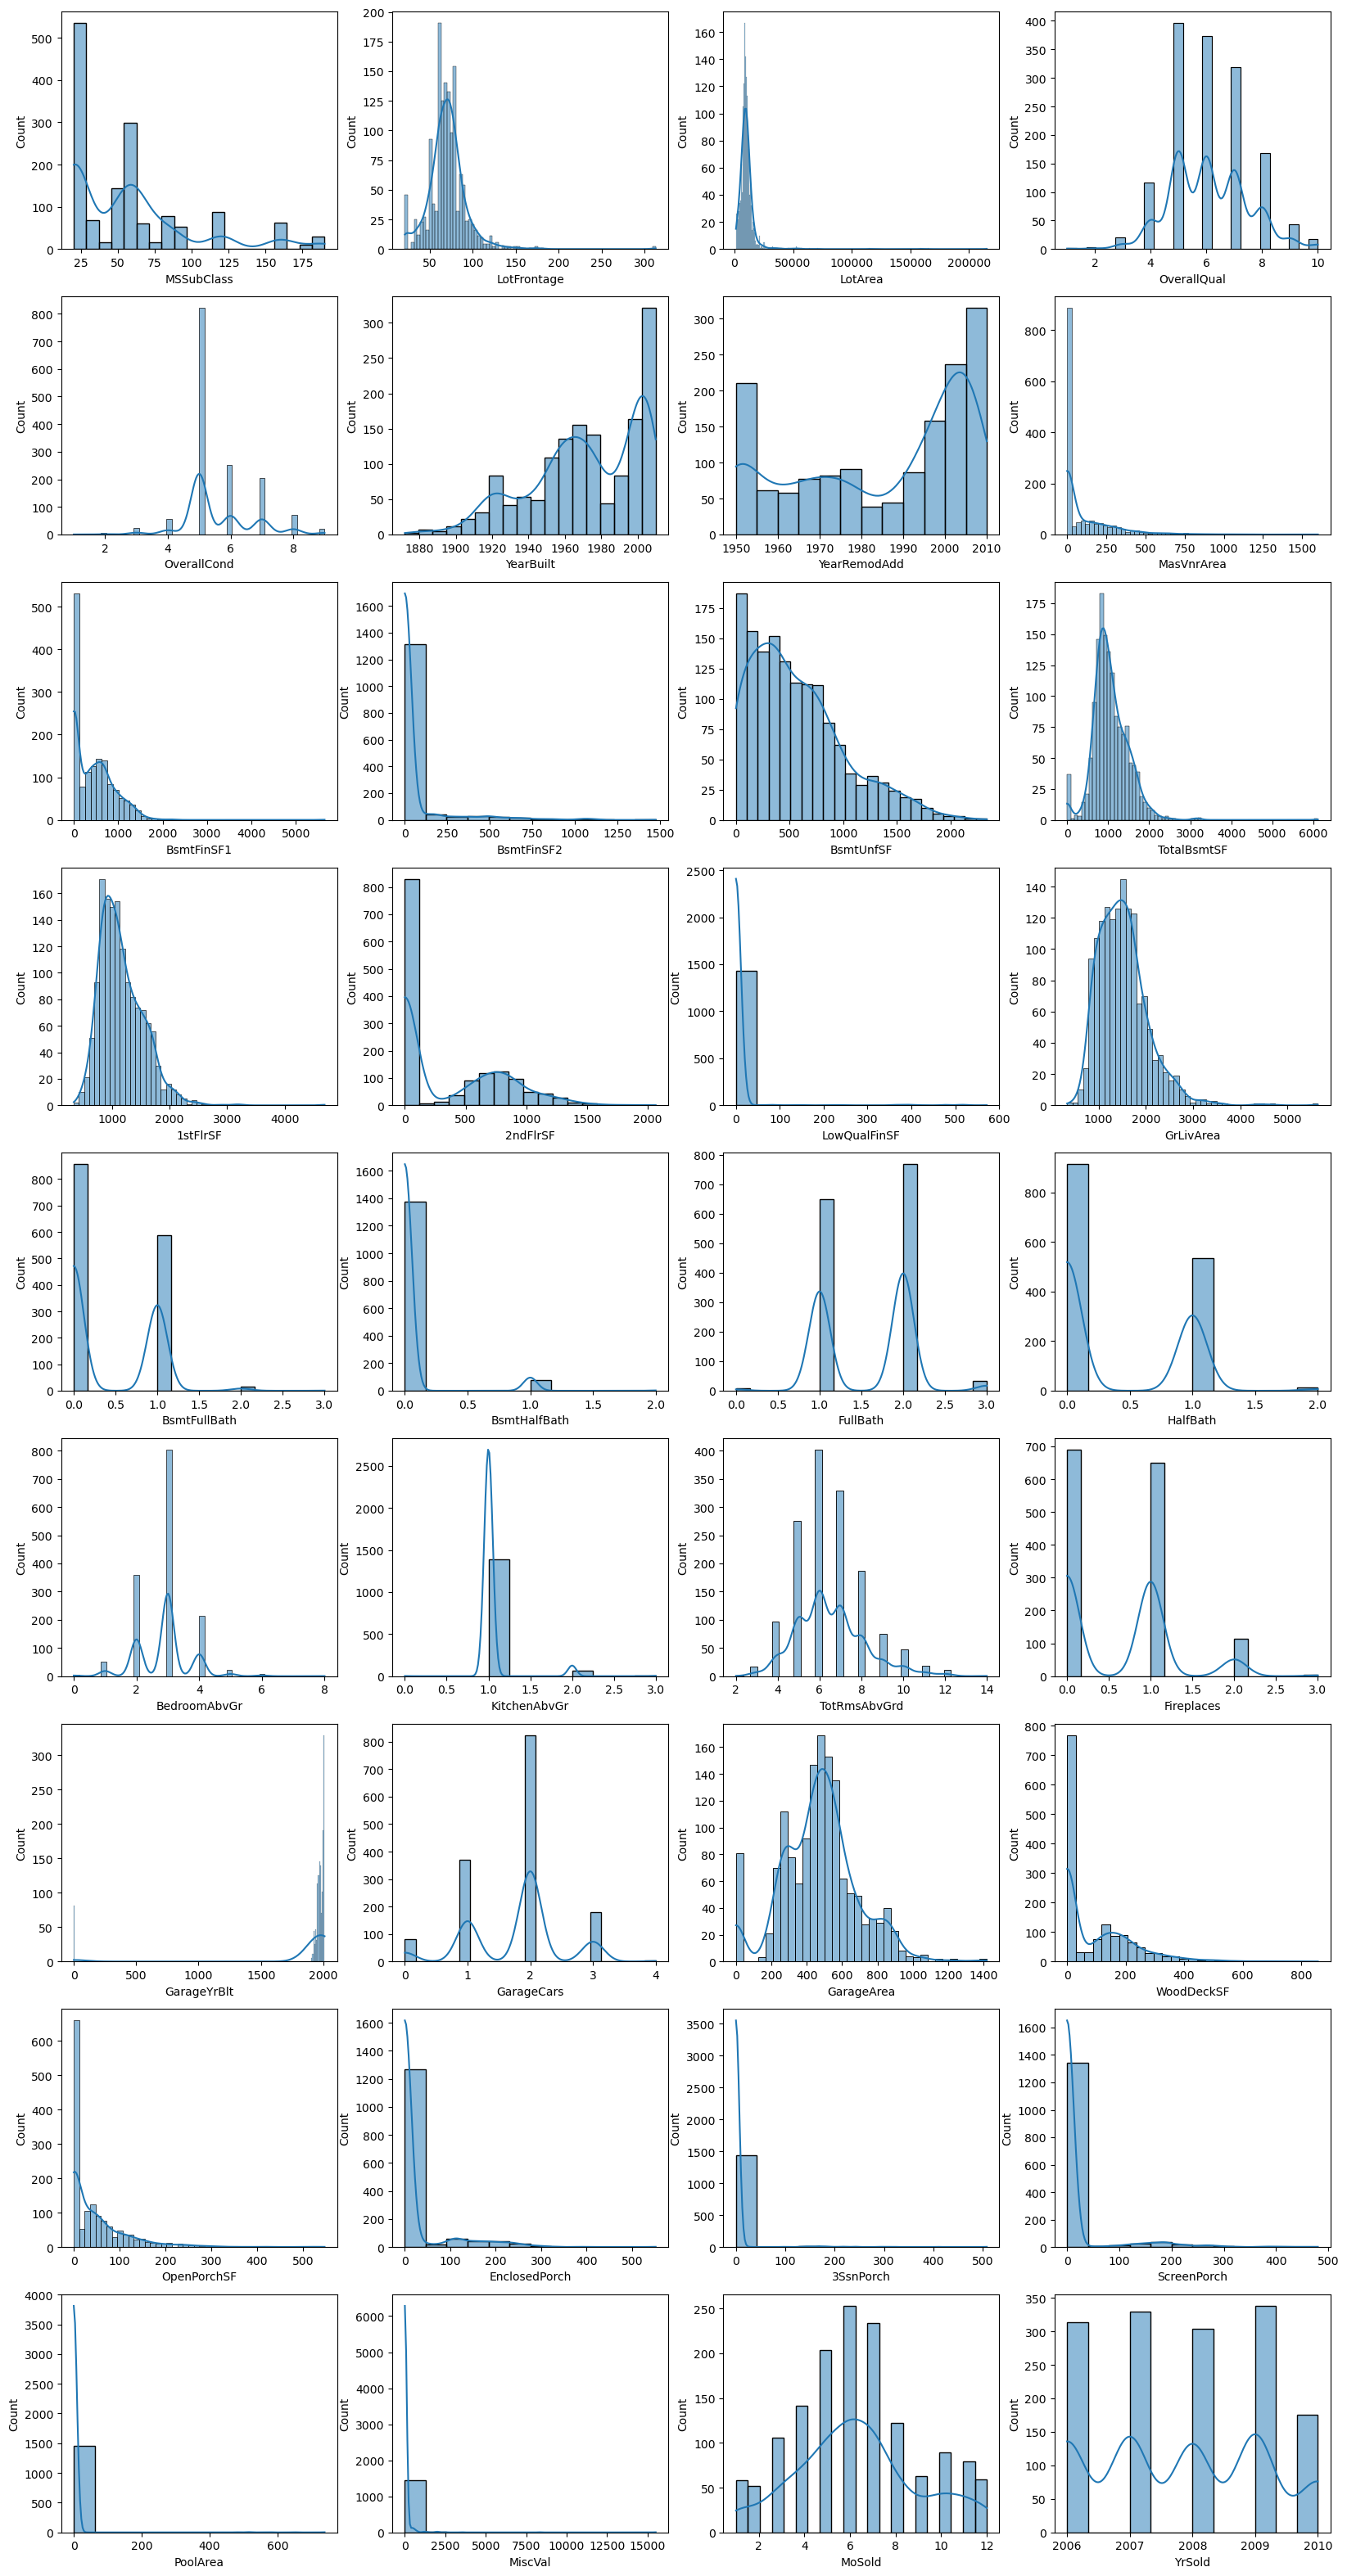

In [120]:
# select the columns to be plotted
cols = data2.columns

# create the figure and axes
fig, axes = plt.subplots(9, 4)
fig.set_size_inches(20, 40)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=data2[col], kde=True, ax = ax)

plt.show()

Notice the range of values for the different variables, this is the reason we need to do feature scaling before we can use these features for modeling. 

Next we will use the the boxplot to identify the outliers.

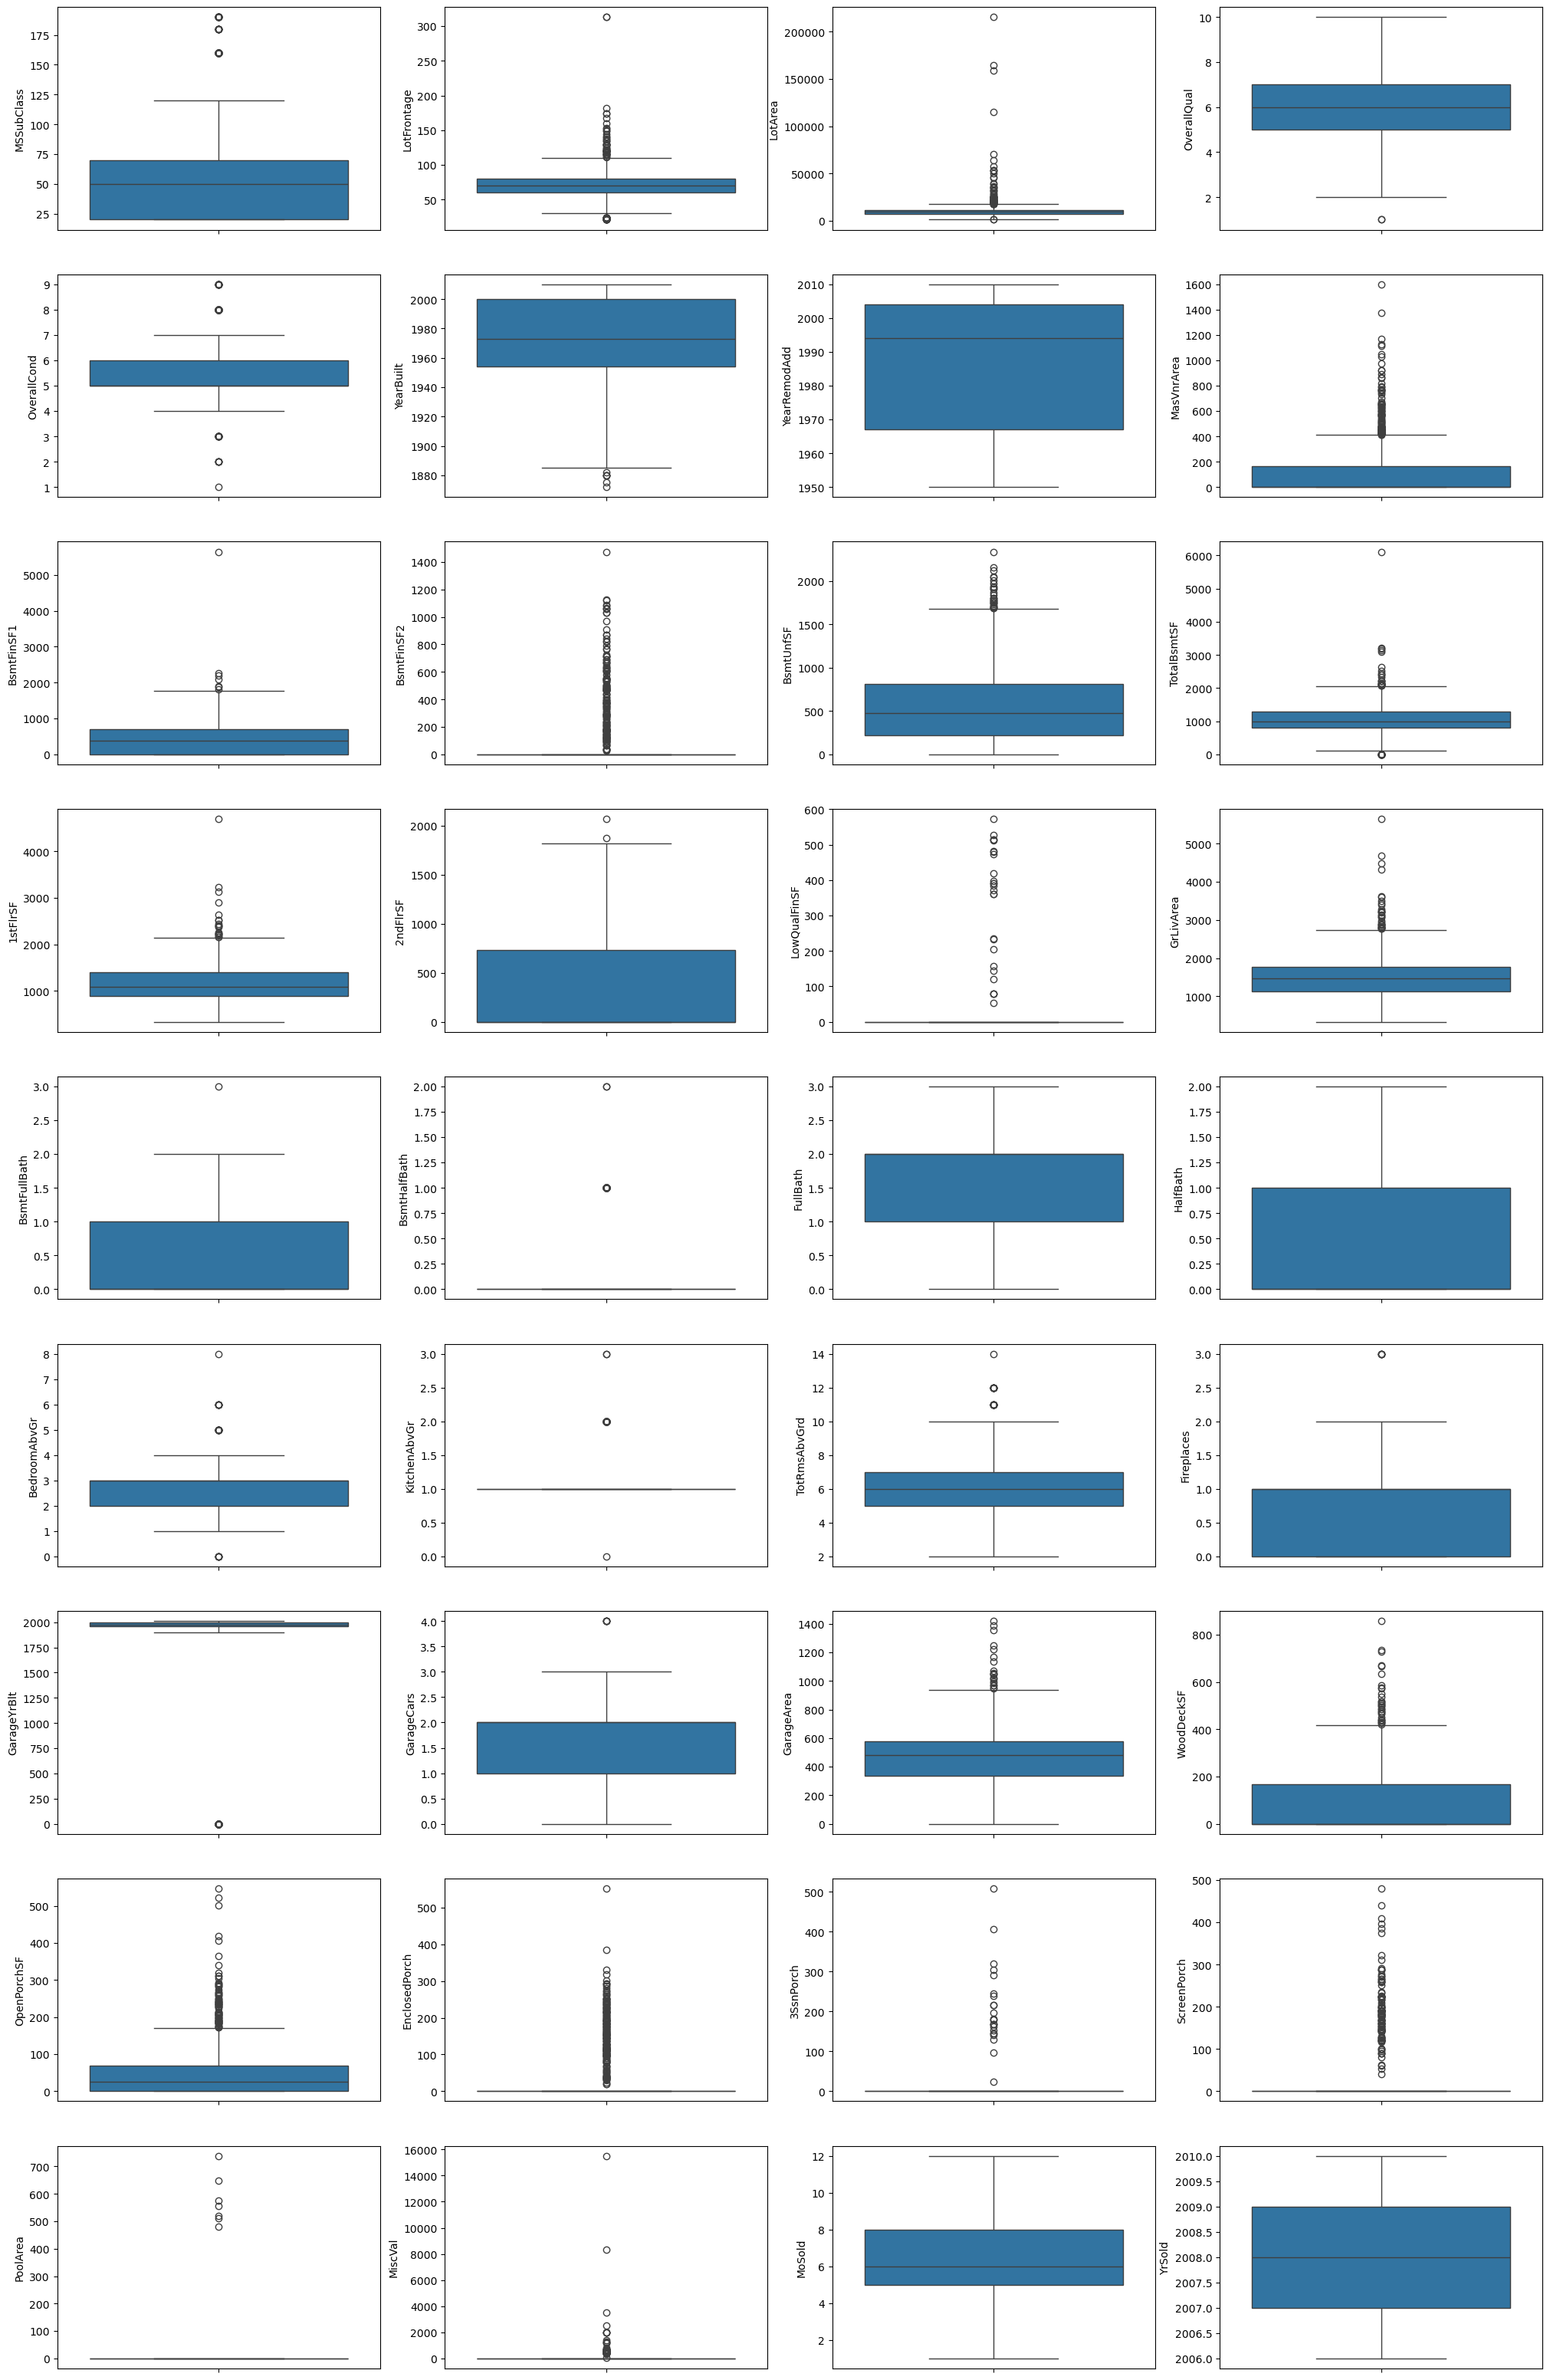

In [121]:
# select the columns to be plotted
cols = data2.columns

# create the figure and axes
fig, axes = plt.subplots(9, 4)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(25, 40)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=data2[col])

plt.show()

Next, we try to handle the outliers.<br>
We can do this by invoking the quantile() method on the DataFrame and then filtering based on the knowledge of the quantiles for each attribute.
The cutoff for outliers is more than 3/2 of the upper quartile and less than 3/2 of the lowetr quartile. 

In [122]:
num_attributes = data2.select_dtypes(exclude=['object'])

high_quant = data2.quantile(.999) #remove houses where we have some attribute that is above the 0.999 quantile
for i in num_attributes.columns:
   data2 = data2.drop(data2[i][data2[i]>high_quant[i]].index)

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   LotFrontage    1422 non-null   float64
 2   LotArea        1422 non-null   int64  
 3   OverallQual    1422 non-null   int64  
 4   OverallCond    1422 non-null   int64  
 5   YearBuilt      1422 non-null   int64  
 6   YearRemodAdd   1422 non-null   int64  
 7   MasVnrArea     1422 non-null   float64
 8   BsmtFinSF1     1422 non-null   int64  
 9   BsmtFinSF2     1422 non-null   int64  
 10  BsmtUnfSF      1422 non-null   int64  
 11  TotalBsmtSF    1422 non-null   int64  
 12  1stFlrSF       1422 non-null   int64  
 13  2ndFlrSF       1422 non-null   int64  
 14  LowQualFinSF   1422 non-null   int64  
 15  GrLivArea      1422 non-null   int64  
 16  BsmtFullBath   1422 non-null   int64  
 17  BsmtHalfBath   1422 non-null   int64  
 18  FullBath     

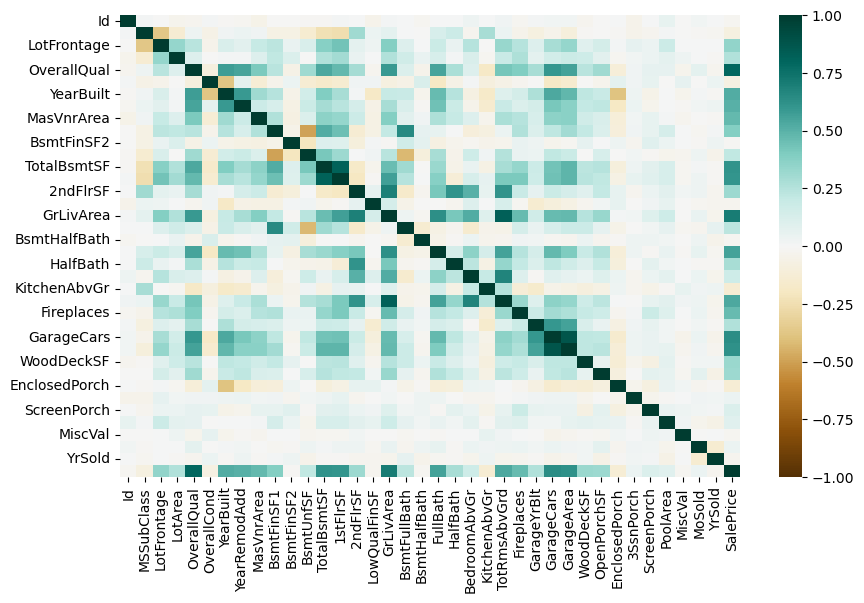

In [123]:
# Generate correlation matrix.
numeric_data = data.select_dtypes(include=[np.number])
corr=numeric_data.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG')
plt.show()

Top features with correlation greater than .5 with sale-price

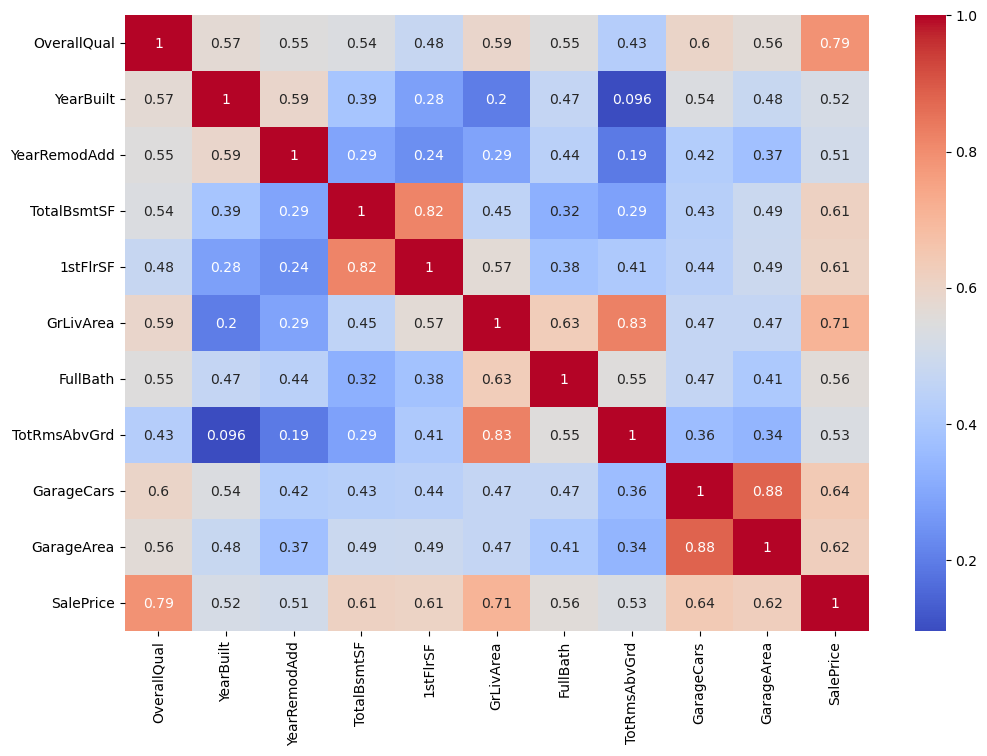

In [124]:
# Step 1: Select features with |correlation| > 0.5 with SalePrice
top_features = corr.index[abs(corr['SalePrice']) > 0.5].tolist()

# Step 2: Create a new correlation matrix with the top features
top_corr = numeric_data[top_features].corr()

# Step 3: Plot the heatmap
plt.subplots(figsize=(12, 8))
sns.heatmap(top_corr, annot=True, cmap='coolwarm')
plt.show()

OverallQual is highly correlated with target feature of saleprice by near 80%

From the listing above we can identify which features have most impact on the Sale Price.
We can also use joint distribution to look for a relationship between all of the possible pairs, two at a time. This can be done by using pairplot()from sns. 
We will use the most promissing features for the pairplot.

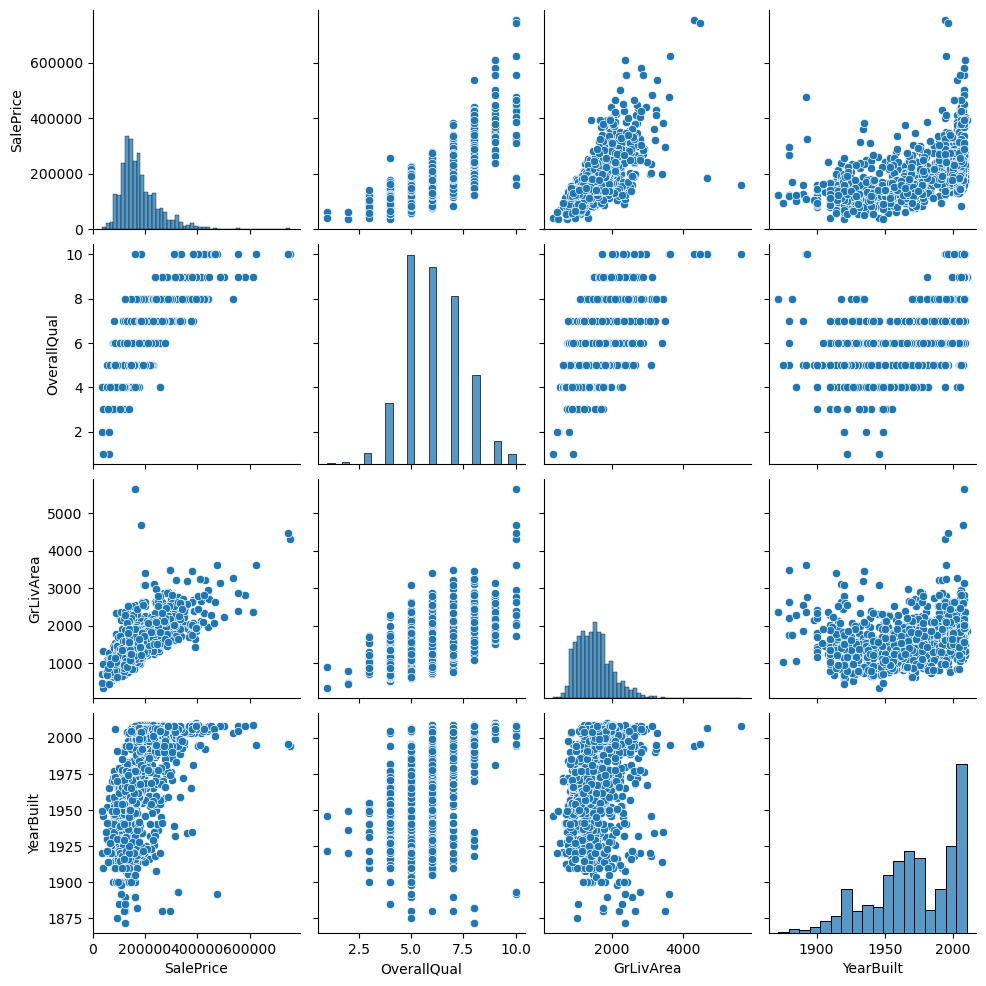

In [125]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(data[col])
plt.show()

We can clearly see how with an increase in GrLivArea the price increases as well.
In order to train our model, let’s look at other types of plots that can make the relationship for the highest correlated variables. The OverallQual, with the target variable, SalePrice, does standout.
Let’s see what the barplot() and boxplot() methods give us.


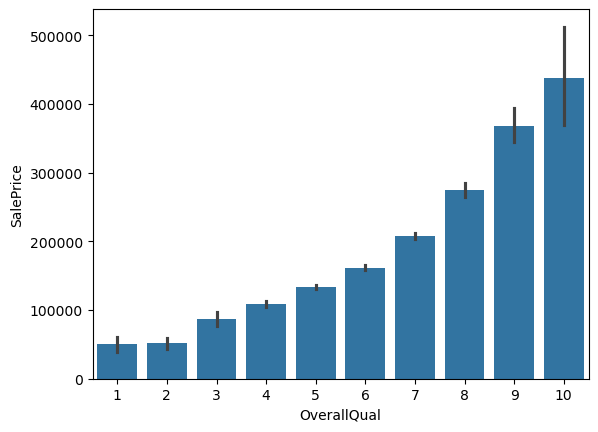

In [126]:
sns.barplot(x=data.OverallQual, y=data.SalePrice)
plt.show()

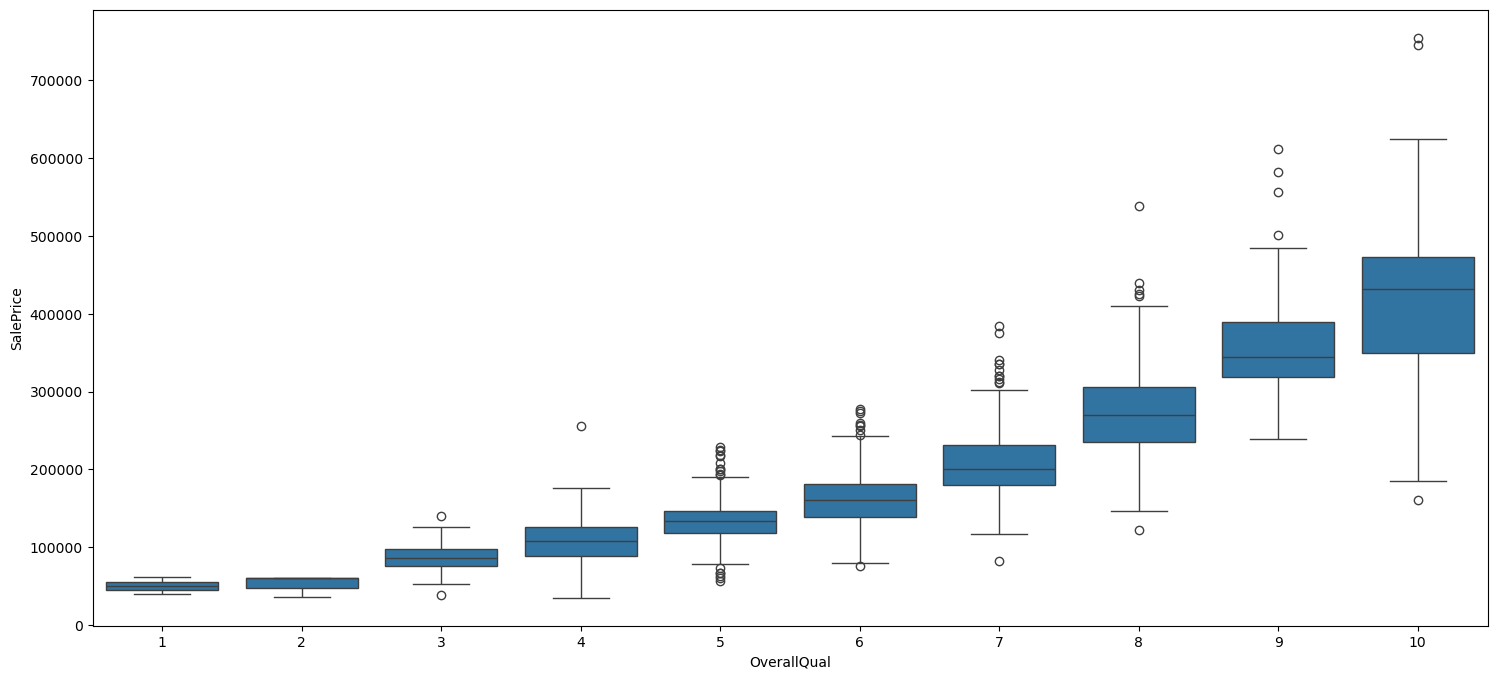

In [127]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=data.OverallQual, y=data.SalePrice)
plt.show()

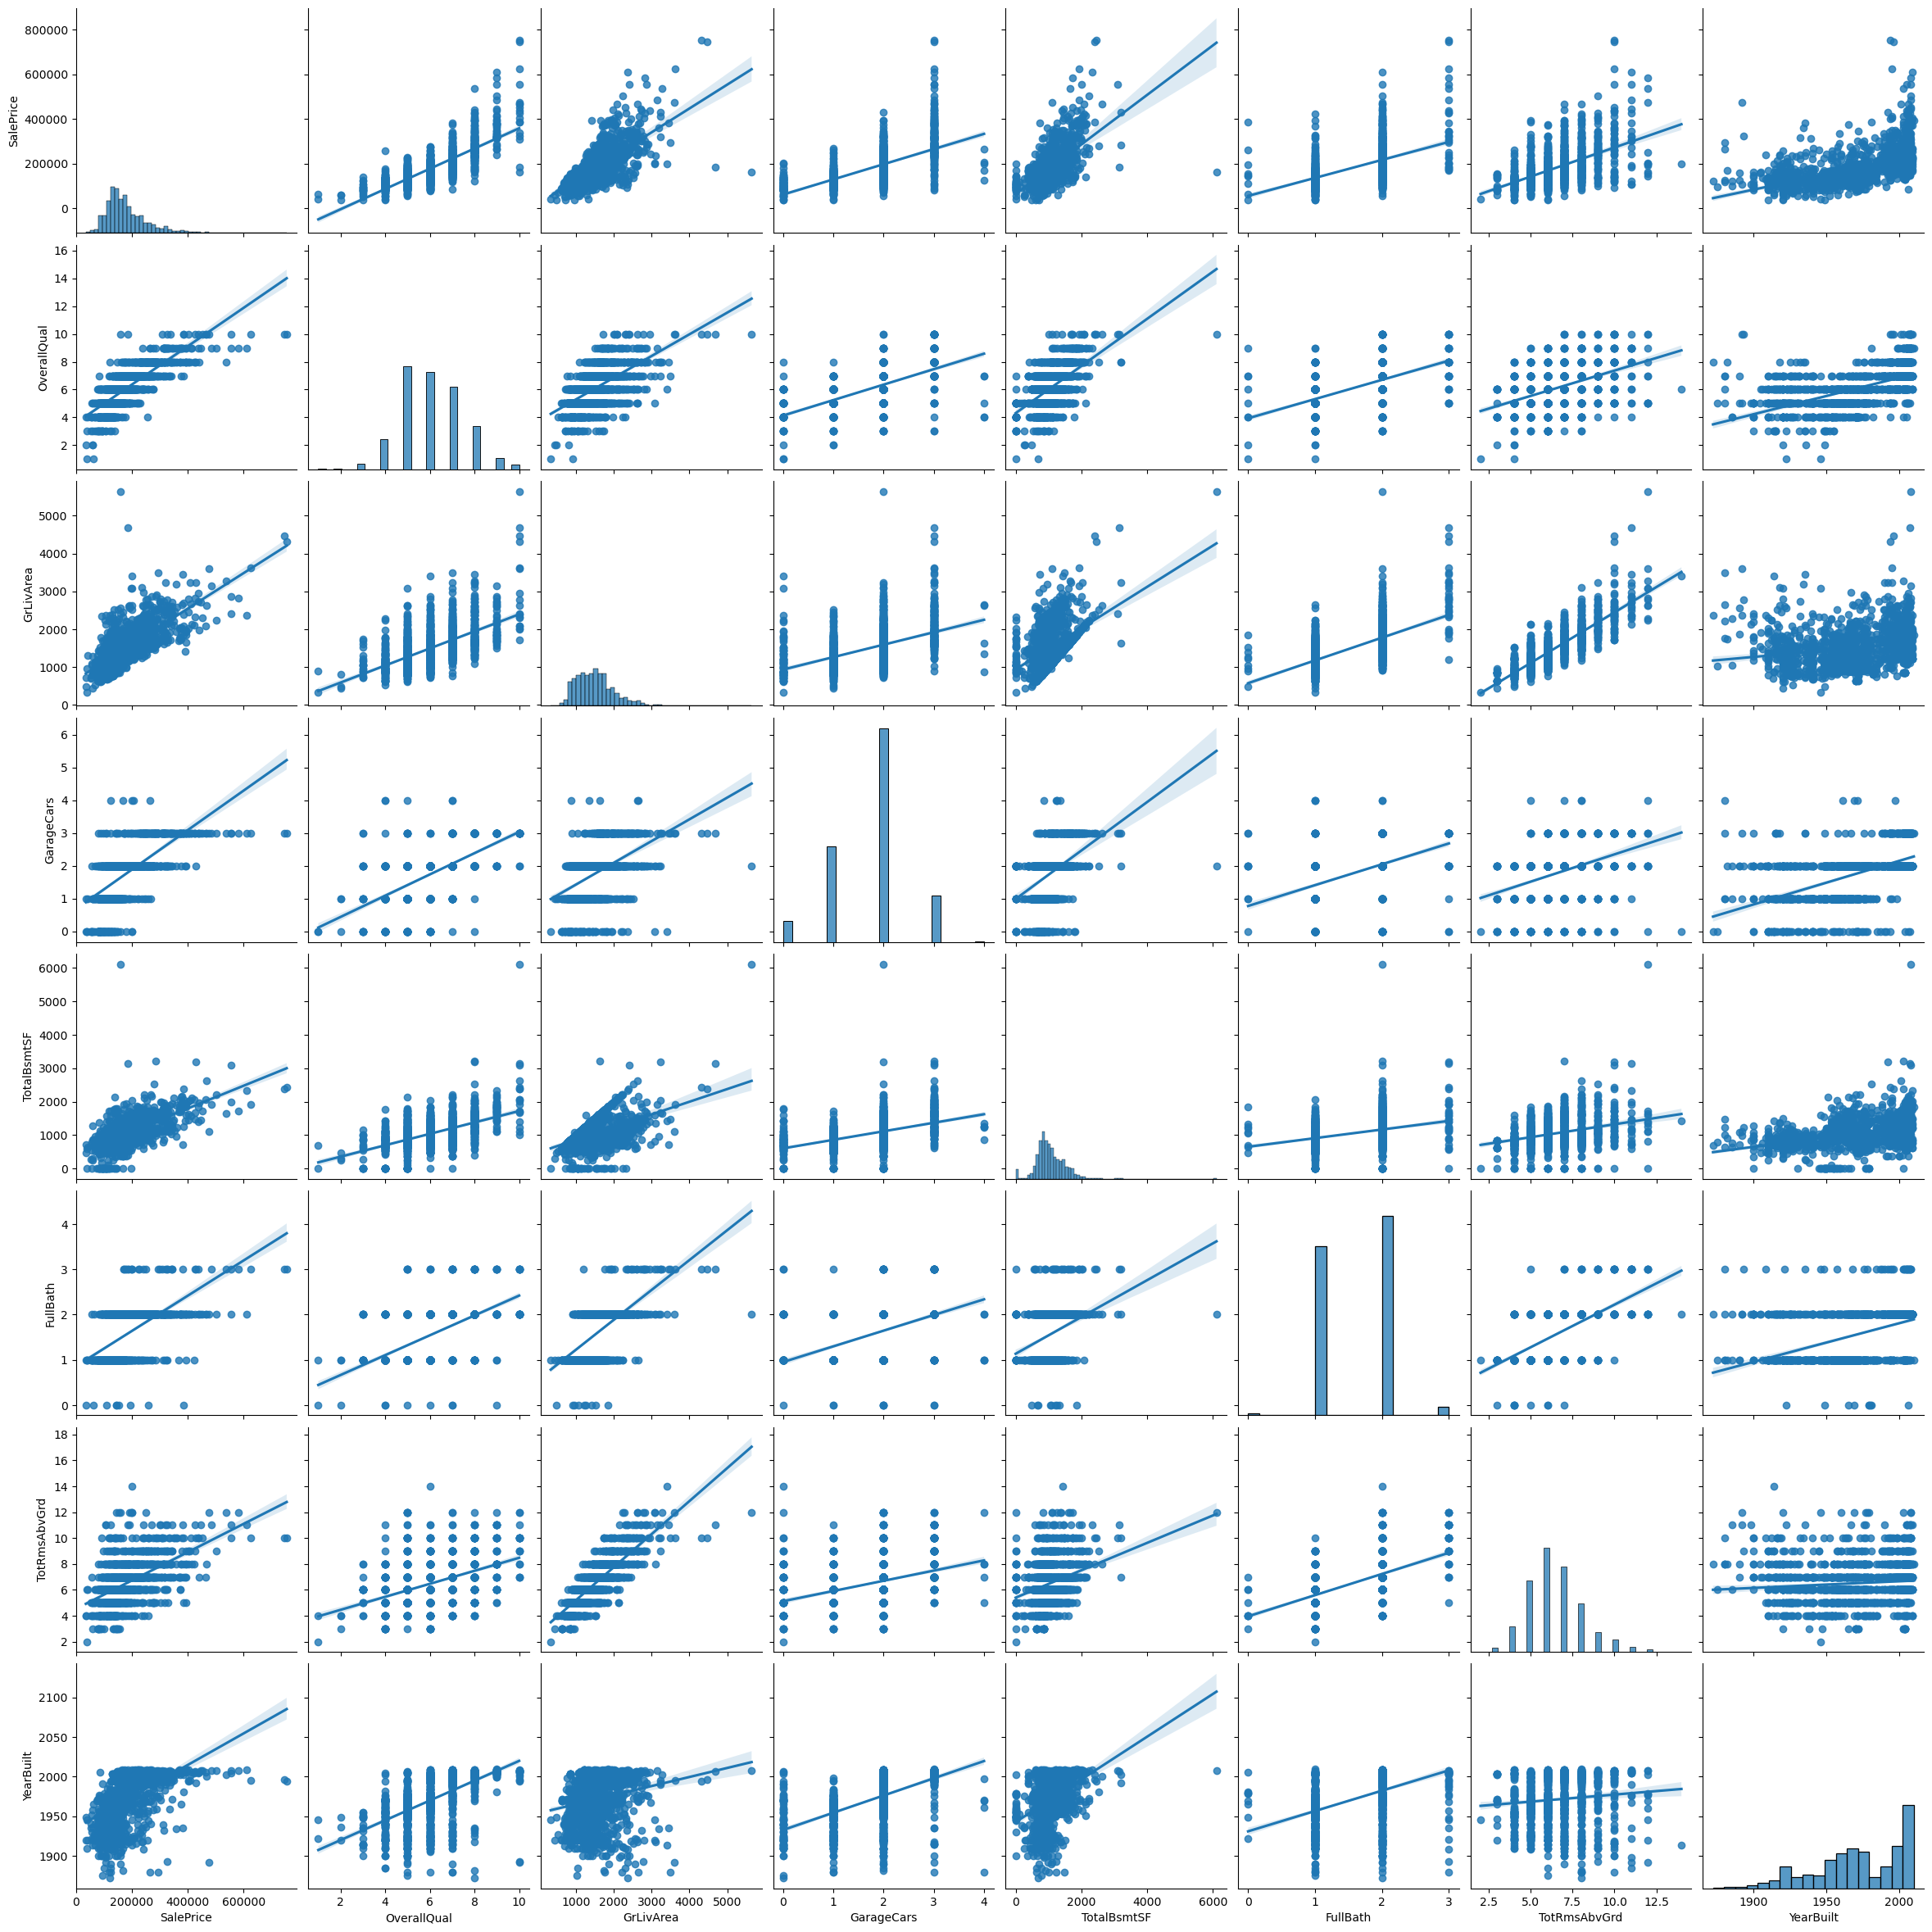

In [128]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data[col], height=3, kind='reg')
plt.show()

In [129]:
print("Most postively correlated features with the target")
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Most postively correlated features with the target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Clearly a strong positive correlation exits between the OverallQual attribute and SalePrice. Notice that at higher qualities there is much higher variability in prices.
From our correlations list, we also know that GarageArea and GarageCars both also have a high correlation with price, but do we need both? Only one should be sufficient for modeling purposes.

In [130]:
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs 

,attribute pair,correlation
0,"(GarageArea, GarageCars)",0.882475
2,"(GrLivArea, TotRmsAbvGrd)",0.825489
1,"(1stFlrSF, TotalBsmtSF)",0.819530
16,"(OverallQual, SalePrice)",0.790982
17,"(GrLivArea, SalePrice)",0.708624
15,"(2ndFlrSF, GrLivArea)",0.687501
31,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
12,"(BsmtFinSF1, BsmtFullBath)",0.649212
5,"(GarageCars, SalePrice)",0.640409
22,"(FullBath, GrLivArea)",0.630012


We can see that we have many highly correlated attributes. Later, we are going to drop the highly correlated variables. We will also drop the attributes that have almost no correlation with price, like MoSold, 3SsnPorch and BsmtFinSF2.
Now let's explore categorical attributes The categorical attributes are:


In [131]:
data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

No duplicate rows

In [132]:
data.duplicated().sum()

np.int64(0)

In [133]:
data.drop(['Id', 'SalePrice'], axis=1)  # remove the "Id" and target "SalePrice"

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2010,WD,Normal


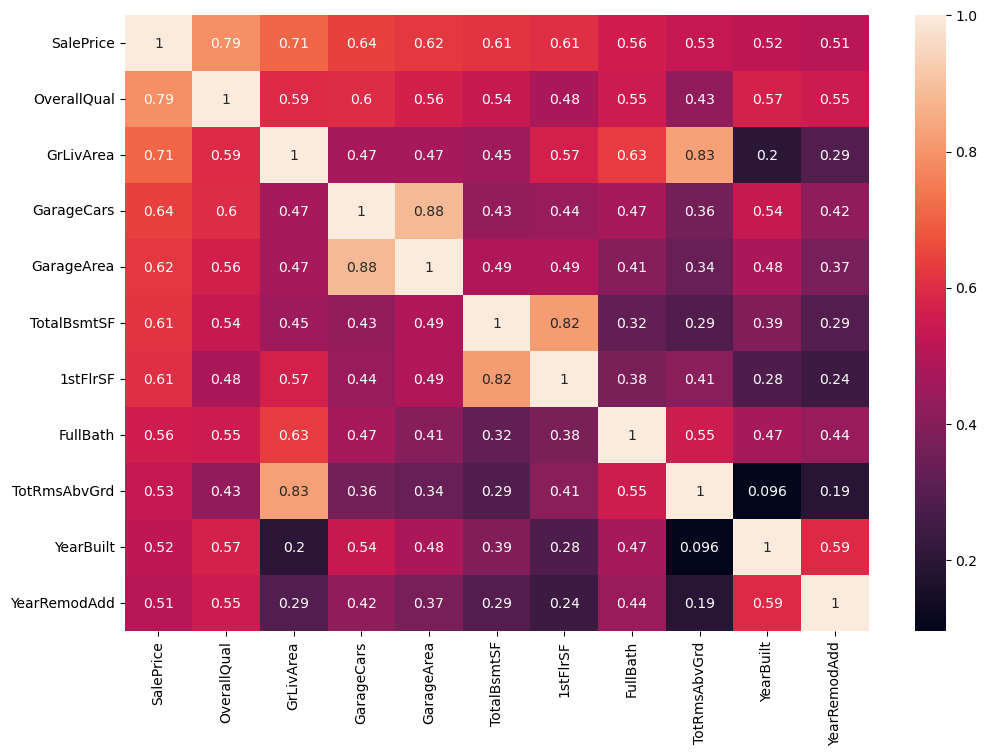

In [134]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Handle Text And Categorical Attributes. A common approach to deal with textual data is to create one binary attribute for each category of the feature.<br>
This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are also known as dummy attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors


In [135]:
#### Transforming Cat variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(data)
housing_processed_1hot  # We have a 1422x7333 matrix which is mostly sparse (zeros).

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118260 stored elements and shape (1460, 9768)>

Going back to distribution plots, we notice that LotArea ranges from 0 to 200000, while GarageCars ranges only from 0 to 4. min-max scaling and standardization.<br>



As noted there a seuence of tranformtaion that must consecutively be applied to the transformation. Scikit-Learn provides the Pipeline class to help with such sequences of transformations.

We are going to create a transformation pipeline based on SimpleImputer(*) and StandardScalar classes for the numerical attributes and OneHotEncoder for dealing with categorical attributes.<br>
Scikit-Learn provides a very handy class, SimpleImputer to take care of missing values. You just tell it the type of imputation, e.g. by median, and voila, the job is done. <br>
First, we will look at a simple example pipeline to impute and scale numerical attributes. Then we will create a full pipeline to handle both numerical and categorical attributes in one go.

In [136]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Separate features and target variable
housing_X = data.drop("SalePrice", axis=1)
housing_y = data["SalePrice"].copy()

# Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude='object')
cat_attributes = housing_X.select_dtypes(include='object')

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

# Numerical Pipeline to impute any missing values with the median and scale attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

So far, we have handled categorical and numerical attributes separately. It is more convenient and clean to have a single transformer handle all columns, applying the appropriate transformations to each column. Scikit-Learn comes to the rescue again by providing the ColumnTransformer for the very purpose.

In [137]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


# Description before applying transforms
print(housing_y.describe())

# Apply log-transform to SalePrice
housing_y_prepared  = np.log(housing_y)

# Run the transformation pipeline on all the other attributes
housing_X_prepared = full_pipeline.fit_transform(housing_X)

# Description after applying transforms
print(housing_y_prepared.describe())

housing_X_prepared

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 116800 stored elements and shape (1460, 299)>

In [138]:
type(housing_X_prepared)

scipy.sparse._csr.csr_matrix

The housing_X_prepared is a scipy csr matrix. If desired, we can convert tp dataframe as follows.

In [139]:
housing_X_prepare2=pd.DataFrame(housing_X_prepared.toarray())

In [140]:
print(housing_X_prepare2.describe())

               0             1             2             3             4    \
count  1460.000000  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean      0.000000 -8.455945e-17  2.920039e-16 -5.840077e-17  1.387018e-16   
std       1.000343  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00   
min      -1.730865 -8.725628e-01 -2.194041e+00 -9.237292e-01 -3.688413e+00   
25%      -0.865432 -8.725628e-01 -4.548501e-01 -2.969908e-01 -7.951515e-01   
50%       0.000000 -1.631095e-01 -8.903656e-03 -1.040633e-01 -7.183611e-02   
75%       0.865432  3.098594e-01  4.370428e-01  1.087080e-01  6.514792e-01   
max       1.730865  3.147673e+00  1.082759e+01  2.051827e+01  2.821425e+00   

                5             6             7             8             9    \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean   3.540547e-16  1.046347e-15  4.496860e-15 -3.893385e-17 -2.433366e-17   
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+0

Create and Assess Machine Learning Models<br>
First we need to create a test set,  the most common approach is to pick some instances randomly, typically 20% of the dataset, and set them aside. The simplest function for doing this Scikit-learn’s train_test_split().

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_X_prepared, housing_y_prepared, test_size=0.2, random_state=7)

Say we want to create a Linear Regression model. In general, this is what it looks like:

In [142]:
from sklearn.linear_model import LinearRegression

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 85.08961526750139


Since we are dealing with a regression problem, we are also going to use RMSE as the main performance measure to assess the quality of our models.<br>

Since we took the log of our target variable, SalePrice. This means that before evaluating RMSE, we need to convert prices back to their original values. Inverse of the log means to simply take the exponential of the log values, i.e., we will simply call np.exp().we are going to write a function as a good coding practice, like so: def inv_y(y):
    return np.exp(y)

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost
import warnings
warnings.filterwarnings('ignore')

# Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collect RMSE for the different algorithms: "algorithm name + rmse"
rmse_compare = pd.Series()
rmse_compare.index.name = 'Model'

# Series to collect accuracy scores for the different algorithms: "algorithm name + score"
scores_compare = pd.Series()
scores_compare.index.name = 'Model'

# Model 1: Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

# Model 2: Decision Trees. Define the model. =============================
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTree'] = dtree_score

# Model 3: Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score

# Model 4: Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoosting'] = gbr_score

We have trained four different models. As you can see, training from one model to another just means that you just select a different one from Scikit-Learn’s library and change a single line of code!

Comparative analysis of the models and their errors. Now let’s get the performance measures for our models in sorted order, from best to worst:

In [144]:
print('RMSE values for different algorithms:')
rmse_compare.sort_values(ascending=True).round()

RMSE values for different algorithms:


Model
GradientBoosting    24855.0
RandomForest        28600.0
LinearRegression    30472.0
DecisionTree        36680.0
dtype: float64

In [145]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
GradientBoosting    91.618
RandomForest        89.135
LinearRegression    85.090
DecisionTree        73.632
dtype: float64

A large prediction error usually means an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model.<br>
In this case, we have trained more powerful models, capable of finding complex nonlinear relationships in the data, like a DecisionTreeRegressor as well. However, the more powerful model seems to be performing worse! The Decision Tree model is overfitting badly enough to perform even worse than the simpler Linear Regression model.<br>
Possible solutions to deal with overfitting are to simplify the model, constrain it, or get more training data.<br>
Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is used to improve the performance of the algorithms. In fact, we can see that Random Forests are performing much better than Decision Trees.

Evaluation Using Cross-Validation<br>
One way to evaluate models is to split the training set into a smaller training set and a validation set, then train the models against the smaller training set and evaluate them against the validation set. This is called cross-validation. We can use Scikit-Learn’s cross-validation feature, cross_val_score, for this.<br>
Let’s perform a K-fold cross-validation on our best model: the cross-validation function randomly splits the training set into K distinct subsets or folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the K evaluation scores:

In [146]:
from sklearn.model_selection import cross_val_score

# Perform K fold cross-validation, where K=10
scores = cross_val_score(linear_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

# Display results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(linear_rmse_scores)

Scores: [0.15575353 0.09721434 0.21149056 0.32233324 0.14773378 0.13720436
 0.1001418  0.24512603 0.11683682 0.11346864]
Mean: 0.16473030934815286
Standard deviation: 0.06947477637101616


Scikit-learn models can be saved easily using the pickle module, or using sklearn.externals.joblib, which is more efficient at serializing large NumPy arrays:

from sklearn.externals import joblib

Save model
joblib.dump(my_model, "my_model.pkl")

Load saved model
my_model_loaded = joblib.load("my_model.pkl")